In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import auc,precision_score,recall_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
df=pd.read_csv("creditcard.csv.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
df.shape

(284807, 31)

In [32]:
df=df[df.Amount<2500]

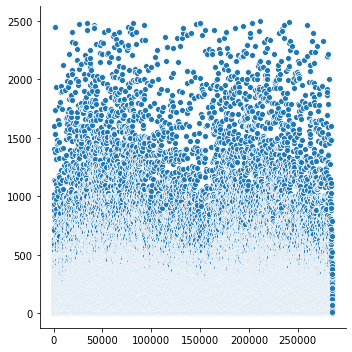

In [33]:
sns.relplot(data=df.Amount)

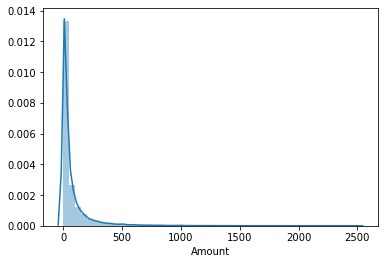

In [34]:
sns.distplot(df.Amount)

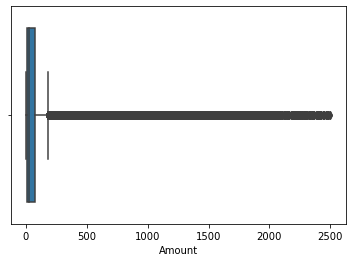

In [35]:
sns.boxplot(df.Amount)

In [36]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [37]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.25,random_state=0)

In [13]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
pred=rfc.predict(x_test)

In [22]:
precision_score(y_test,pred)

0.9999156224950428

In [23]:
recall_score(y_test,pred)

1.0

# Prediction On total data

In [25]:
total_pred=rfc.predict(X)

In [26]:
precision_score(total_pred,y)

1.0

In [27]:
recall_score(total_pred,y)

0.9879518072289156